<a href="https://colab.research.google.com/github/Ardalan-gerami81/HW_ML/blob/main/Copy_of_HW_NN_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>
<font size=4>
<br/>
</div>

# Personal Data

In [1]:
# Set your student number
student_number = 99102112
Name = 'Ardalan'
Last_Name = 'Gerami'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [3]:
import torch
import random as rn
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import numpy as np
from matplotlib import pyplot as plt
from typing import Dict
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [4]:
## FILL HERE
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#Hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001
#CIFAR10-dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
#Data-loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

100%|██████████| 170498071/170498071 [00:04<00:00, 41611721.77it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


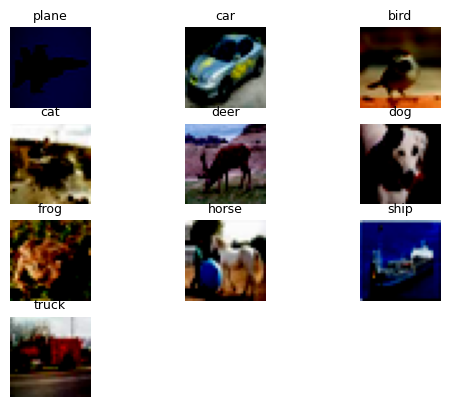

In [5]:
## FILL HERE
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
num_classes = len(classes)
i = 0
rn = np.random.randint(1,len(train_dataset))
while i < num_classes:
  if train_dataset[rn][1] == i:
    plt.subplot(4,3,i+1)
    plt.imshow(train_dataset[rn][0].permute(1, 2, 0))
    plt.axis('off')
    plt.title(classes[i], fontsize = 9)
    i += 1
  rn +=1
  if rn>=len(train_dataset):
    rn = 0
plt.show()

## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [6]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        # N, 3, 32, 32
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [7]:
## FILL HERE
criterion = nn.CrossEntropyLoss()
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [8]:
epoch_nums = 15
for epoch in range(epoch_nums):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
    print(f' loss: {running_loss / len(train_loader)}')
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

 loss: 1.5107895755188174
 loss: 1.1607606615382589
 loss: 0.9988460978367965
 loss: 0.8888885006451561
 loss: 0.8186935986262899
 loss: 0.7535080195083423
 loss: 0.7052573820889492
 loss: 0.6672526553359004
 loss: 0.629318777264423
 loss: 0.5990335083282383
 loss: 0.5725399280397159
 loss: 0.5369978637427988
 loss: 0.5140712008986119
 loss: 0.4860275171253823
 loss: 0.4637386637405562
Finished Training


## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [9]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(PATH))
loaded_model.to(device)
loaded_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    n_samples = len(test_loader.dataset)
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs1 = model(images)
        outputs2 = loaded_model(images)
        _, predicted1 = torch.max(outputs1, 1)
        _, predicted2 = torch.max(outputs2, 1)
        correct += (predicted1 == labels).sum().item()
        total += (predicted2 == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 100 %


Here, we also calculate the model performance for each class as well.

In [10]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for images, labels in test_loader:
        labels, images, outputs = labels.to(device), images.to(device), model(images)
        _, predicted = torch.max(outputs, 1)
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'{classname:5s} is {accuracy:.1f} %')

plane is 73.5 %
car   is 85.7 %
bird  is 68.3 %
cat   is 53.3 %
deer  is 71.4 %
dog   is 60.0 %
frog  is 72.1 %
horse is 73.8 %
ship  is 77.1 %
truck is 79.1 %
